![cover](ml_image.jpg)

# Our Model

> ### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import os
import csv
from sklearn import linear_model
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

> ### Reading the main csv data file

In [2]:
data_train = pd.read_csv("data.csv")

In [3]:
data_train

,YEAR,ANDAMAN AND NICOBAR,PUDUCHERRY,DAMAN AND DIU,CHANDIGARH,DELHI,J AND K,LAKSHADWEEP
0,1990,3017,4168,206,2098,39773,15257,30
1,1991,2738,5060,264,2008,45165,15959,46
2,1992,2647,4948,231,1796,46744,15870,55
3,1993,2704,3794,229,2235,47466,15615,48
4,1994,2070,9819,226,2164,49720,16008,52
5,1995,2246,4776,289,2092,60638,16996,31
6,1997,2938,5664,273,2364,67036,19712,26
7,1998,3058,5401,348,1967,75646,21072,59
8,1999,3409,5811,252,3241,68883,18889,31
9,2000,3659,4160,225,3709,68075,20792,30


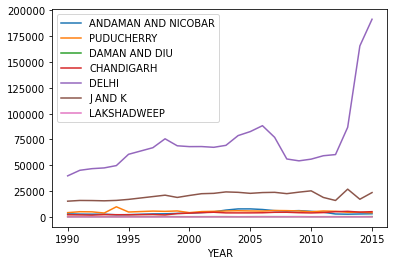

In [4]:
%matplotlib inline

data_train.set_index('YEAR').plot();
#data_train.plot(x=["YEAR", "ANDAMAN AND NICOBAR", "PUDUCHERRY", "DAMAN AND DIU", "CHANDIGARH", "DELHI", "J AND K", "LAKSHADWEEP"] y=["CRIME"], kind="bar")

> ### Reading the actual csv data file for the year 2016-2019

In [5]:
data_actual = pd.read_csv("actual.csv")

In [6]:
data_actual

,YEAR,ANDAMAN AND NICOBAR,PUDUCHERRY,DAMAN AND DIU,CHANDIGARH,DELHI,J AND K,LAKSHADWEEP
0,2016,2491,4885,287,4256,216920,26624,50
1,2017,3014,4799,382,5462,244714,25608,114
2,2018,2699,4674,334,5967,262612,27276,77
3,2019,4034,4004,370,4518,316261,25408,182


> ## 1. ANDAMAN AND NICOBAR

In [7]:
# ANDAMAN AND NICOBAR

In [8]:
reg = linear_model.LinearRegression()
reg.fit(data_train[['YEAR']], data_train[['ANDAMAN AND NICOBAR']])

LinearRegression()

In [9]:
data_test = pd.read_csv("predict.csv")
data_test

,YEAR
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


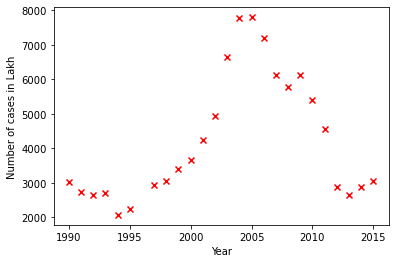

In [10]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['ANDAMAN AND NICOBAR']], color = 'red', marker = 'x')

In [11]:
y = reg.predict(data_test)
y

array([[5379.22202797],
       [5463.73426573],
       [5548.2465035 ],
       [5632.75874126],
       [5717.27097902],
       [5801.78321678],
       [5886.29545455],
       [5970.80769231],
       [6055.31993007],
       [6139.83216783],
       [6224.34440559],
       [6308.85664336],
       [6393.36888112],
       [6477.88111888],
       [6562.39335664]])

In [12]:
data_test['ANDAMAN AND NICOBAR'] = y

In [13]:
data_test.to_csv("predicted/andaman.csv", index = False)
data_test

,YEAR,ANDAMAN AND NICOBAR
0,2016,5379.222028
1,2017,5463.734266
2,2018,5548.246503
3,2019,5632.758741
4,2020,5717.270979
5,2021,5801.783217
6,2022,5886.295455
7,2023,5970.807692
8,2024,6055.319930
9,2025,6139.832168


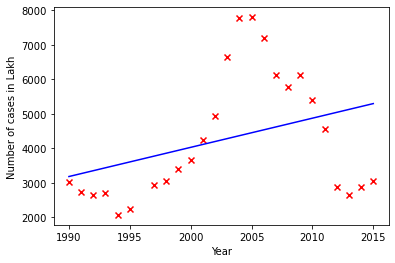

In [14]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['ANDAMAN AND NICOBAR']], color = 'red', marker = 'x')
plt.plot(data_train[['YEAR']], reg.predict(data_train[['YEAR']]), color = 'blue')

In [15]:
data_andaman = pd.read_csv('predicted/andaman.csv')
data_andaman.head(4)

,YEAR,ANDAMAN AND NICOBAR
0,2016,5379.222028
1,2017,5463.734266
2,2018,5548.246503
3,2019,5632.758741


In [16]:
mae_andaman = metrics.mean_absolute_error(data_andaman.head(4)[['ANDAMAN AND NICOBAR']], data_actual[['ANDAMAN AND NICOBAR']])
mse_andaman = metrics.mean_squared_error(data_andaman.head(4)[['ANDAMAN AND NICOBAR']], data_actual[['ANDAMAN AND NICOBAR']])
rmse_andaman = np.sqrt(mse_andaman)

print("MAE:", mae_andaman)
print("MSE:", mse_andaman)
print("RMSE:", rmse_andaman)

MAE: 2446.4903846153975
MSE: 6254314.901503498
RMSE: 2500.862831405093


> ## 2. PUDUCHERRY

In [17]:
# PUDUCHERRY

In [18]:
reg = linear_model.LinearRegression()
reg.fit(data_train[['YEAR']], data_train[['PUDUCHERRY']])

LinearRegression()

In [19]:
data_test = pd.read_csv("predict.csv")
data_test

,YEAR
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


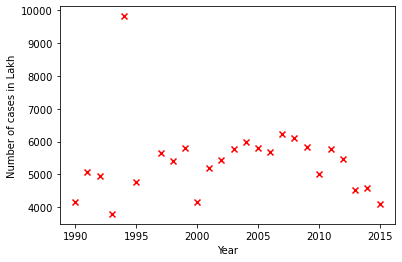

In [20]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['PUDUCHERRY']], color = 'red', marker = 'x')

In [21]:
y = reg.predict(data_test)
y

array([[5276.15001128],
       [5266.50575231],
       [5256.86149335],
       [5247.21723438],
       [5237.57297541],
       [5227.92871644],
       [5218.28445748],
       [5208.64019851],
       [5198.99593954],
       [5189.35168058],
       [5179.70742161],
       [5170.06316264],
       [5160.41890368],
       [5150.77464471],
       [5141.13038574]])

In [22]:
data_test['PUDUCHERRY'] = y

In [23]:
data_test.to_csv("predicted/puducherry.csv", index = False)

In [24]:
data_test

,YEAR,PUDUCHERRY
0,2016,5276.150011
1,2017,5266.505752
2,2018,5256.861493
3,2019,5247.217234
4,2020,5237.572975
5,2021,5227.928716
6,2022,5218.284457
7,2023,5208.640199
8,2024,5198.995940
9,2025,5189.351681


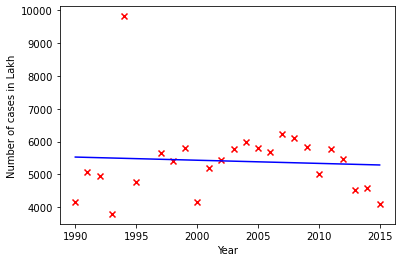

In [25]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['PUDUCHERRY']], color = 'red', marker = 'x')
plt.plot(data_train[['YEAR']], reg.predict(data_train[['YEAR']]), color = 'blue')

In [26]:
data_pudu = pd.read_csv('predicted/puducherry.csv')
data_pudu.head(4)

,YEAR,PUDUCHERRY
0,2016,5276.150011
1,2017,5266.505752
2,2018,5256.861493
3,2019,5247.217234


In [27]:
mae_pudu = metrics.mean_absolute_error(data_pudu.head(4)[['PUDUCHERRY']], data_actual[['PUDUCHERRY']])
mse_pudu = metrics.mean_squared_error(data_pudu.head(4)[['PUDUCHERRY']], data_actual[['PUDUCHERRY']])
rmse_pudu = np.sqrt(mse_pudu)

print("MAE:", mae_pudu)
print("MSE:", mse_pudu)
print("RMSE:", rmse_pudu)

MAE: 671.1836228287848
MSE: 564219.1430122931
RMSE: 751.1452209874553


> ## 3. DAMAN AND DIU

In [28]:
# DAMAN AND DIU

In [29]:
reg = linear_model.LinearRegression()
reg.fit(data_train[['YEAR']], data_train[['DAMAN AND DIU']])

LinearRegression()

In [30]:
data_test = pd.read_csv("predict.csv")
data_test

,YEAR
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


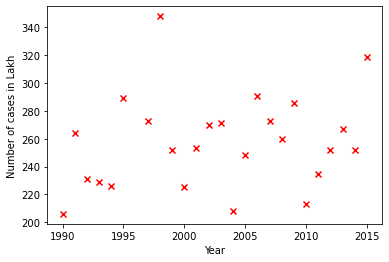

In [31]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['DAMAN AND DIU']], color = 'red', marker = 'x')

In [32]:
y = reg.predict(data_test)
y

array([[269.58526957],
       [270.48748026],
       [271.38969095],
       [272.29190165],
       [273.19411234],
       [274.09632303],
       [274.99853372],
       [275.90074442],
       [276.80295511],
       [277.7051658 ],
       [278.60737649],
       [279.50958719],
       [280.41179788],
       [281.31400857],
       [282.21621926]])

In [33]:
data_test['DAMAN AND DIU'] = y

In [34]:
data_test.to_csv("predicted/daman.csv", index = False)

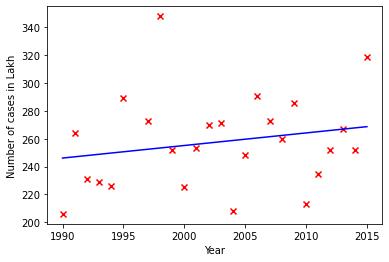

In [35]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['DAMAN AND DIU']], color = 'red', marker = 'x')
plt.plot(data_train[['YEAR']], reg.predict(data_train[['YEAR']]), color = 'blue')

In [36]:
data_daman = pd.read_csv('predicted/daman.csv')
data_daman.head(4)

,YEAR,DAMAN AND DIU
0,2016,269.585270
1,2017,270.487480
2,2018,271.389691
3,2019,272.291902


In [37]:
mae_daman = metrics.mean_absolute_error(data_daman.head(4)[['DAMAN AND DIU']], data_actual[['DAMAN AND DIU']])
mse_daman = metrics.mean_squared_error(data_daman.head(4)[['DAMAN AND DIU']], data_actual[['DAMAN AND DIU']])
rmse_daman = np.sqrt(mse_daman)

print("MAE:", mae_daman)
print("MSE:", mse_daman)
print("RMSE:", rmse_daman)

MAE: 72.31141439205976
MSE: 6551.30954424754
RMSE: 80.94016026823482


> ## 4. CHANDIGARH

In [38]:
# CHANDIGARH

In [39]:
reg = linear_model.LinearRegression()
reg.fit(data_train[['YEAR']], data_train[['CHANDIGARH']])

LinearRegression()

In [40]:
data_test = pd.read_csv("predict.csv")
data_test

,YEAR
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


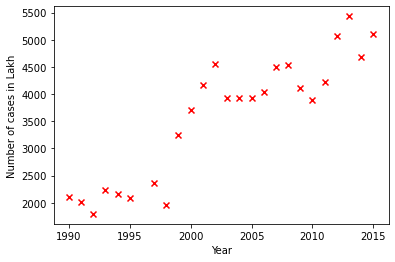

In [41]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['CHANDIGARH']], color = 'red', marker = 'x')

In [42]:
y = reg.predict(data_test)
y

array([[5401.55693097],
       [5538.28479585],
       [5675.01266073],
       [5811.7405256 ],
       [5948.46839048],
       [6085.19625536],
       [6221.92412023],
       [6358.65198511],
       [6495.37984999],
       [6632.10771487],
       [6768.83557974],
       [6905.56344462],
       [7042.2913095 ],
       [7179.01917437],
       [7315.74703925]])

In [43]:
data_test['CHANDIGARH'] = y

In [44]:
data_test.to_csv("predicted/chandigarh.csv", index = False)
data_test

,YEAR,CHANDIGARH
0,2016,5401.556931
1,2017,5538.284796
2,2018,5675.012661
3,2019,5811.740526
4,2020,5948.468390
5,2021,6085.196255
6,2022,6221.924120
7,2023,6358.651985
8,2024,6495.379850
9,2025,6632.107715


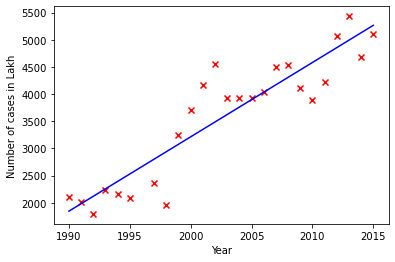

In [45]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['CHANDIGARH']], color = 'red', marker = 'x')
plt.plot(data_train[['YEAR']], reg.predict(data_train[['YEAR']]), color = 'blue')

In [46]:
data_chandi = pd.read_csv('predicted/chandigarh.csv')
data_chandi.head(4)

,YEAR,CHANDIGARH
0,2016,5401.556931
1,2017,5538.284796
2,2018,5675.012661
3,2019,5811.740526


In [47]:
mae_chandi = metrics.mean_absolute_error(data_chandi.head(4)[['CHANDIGARH']], data_actual[['CHANDIGARH']])
mse_chandi = metrics.mean_squared_error(data_chandi.head(4)[['CHANDIGARH']], data_actual[['CHANDIGARH']])
rmse_chandi = np.sqrt(mse_chandi)

print("MAE:", mae_chandi)
print("MSE:", mse_chandi)
print("RMSE:", rmse_chandi)

MAE: 701.8923979246756
MSE: 769285.3015152989
RMSE: 877.0891069414207


> ## 5. DELHI

In [48]:
# DELHI

In [49]:
reg = linear_model.LinearRegression()
reg.fit(data_train[['YEAR']], data_train[['DELHI']])

LinearRegression()

In [50]:
data_test = pd.read_csv("predict.csv")
data_test

,YEAR
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


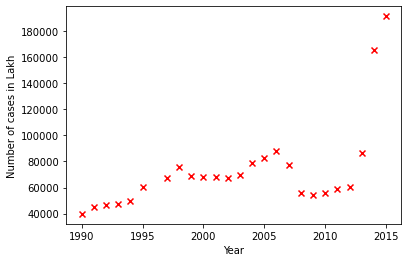

In [51]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['DELHI']], color = 'red', marker = 'x')

In [52]:
y = reg.predict(data_test)
y

array([[108811.89767088],
       [111500.06214753],
       [114188.22662418],
       [116876.39110083],
       [119564.55557749],
       [122252.72005414],
       [124940.88453079],
       [127629.04900744],
       [130317.2134841 ],
       [133005.37796075],
       [135693.5424374 ],
       [138381.70691405],
       [141069.8713907 ],
       [143758.03586736],
       [146446.20034401]])

In [53]:
data_test['DELHI'] = y

In [54]:
data_test.to_csv("predicted/delhi.csv", index = False)
data_test

,YEAR,DELHI
0,2016,108811.897671
1,2017,111500.062148
2,2018,114188.226624
3,2019,116876.391101
4,2020,119564.555577
5,2021,122252.720054
6,2022,124940.884531
7,2023,127629.049007
8,2024,130317.213484
9,2025,133005.377961


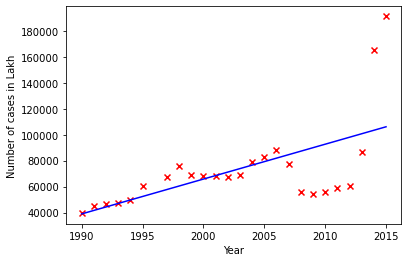

In [55]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['DELHI']], color = 'red', marker = 'x')
plt.plot(data_train[['YEAR']], reg.predict(data_train[['YEAR']]), color = 'blue')

In [56]:
data_delhi = pd.read_csv('predicted/delhi.csv')
data_delhi.head(4)

,YEAR,DELHI
0,2016,108811.897671
1,2017,111500.062148
2,2018,114188.226624
3,2019,116876.391101


In [57]:
mae_delhi = metrics.mean_absolute_error(data_delhi.head(4)[['DELHI']], data_actual[['DELHI']])
mse_delhi = metrics.mean_squared_error(data_delhi.head(4)[['DELHI']], data_actual[['DELHI']])
rmse_delhi = np.sqrt(mse_delhi)

print("MAE:", mae_delhi)
print("MSE:", mse_delhi)
print("RMSE:", rmse_delhi)

MAE: 147282.6056141446
MSE: 22804288449.08895
RMSE: 151010.8885116863


> ## 6. JAMMU AND KASHMIR

In [58]:
# J AND K

In [59]:
reg = linear_model.LinearRegression()
reg.fit(data_train[['YEAR']], data_train[['J AND K']])

LinearRegression()

In [60]:
data_test = pd.read_csv("predict.csv")
data_test

,YEAR
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


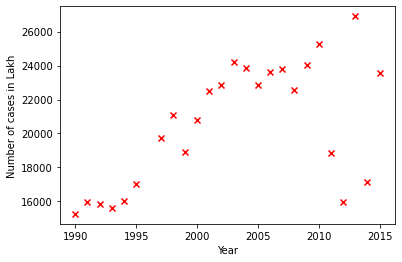

In [61]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['J AND K']], color = 'red', marker = 'x')

In [62]:
y = reg.predict(data_test)
y

array([[24274.75981277],
       [24555.00451162],
       [24835.24921047],
       [25115.49390932],
       [25395.73860817],
       [25675.98330702],
       [25956.22800587],
       [26236.47270471],
       [26516.71740356],
       [26796.96210241],
       [27077.20680126],
       [27357.45150011],
       [27637.69619896],
       [27917.94089781],
       [28198.18559666]])

In [63]:
data_test['J AND K'] = y

In [64]:
data_test.to_csv("predicted/jk.csv", index = False)
data_test

,YEAR,J AND K
0,2016,24274.759813
1,2017,24555.004512
2,2018,24835.249210
3,2019,25115.493909
4,2020,25395.738608
5,2021,25675.983307
6,2022,25956.228006
7,2023,26236.472705
8,2024,26516.717404
9,2025,26796.962102


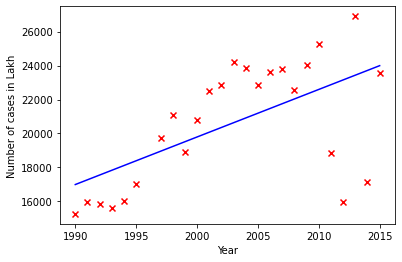

In [65]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['J AND K']], color = 'red', marker = 'x')
plt.plot(data_train[['YEAR']], reg.predict(data_train[['YEAR']]), color = 'blue')

In [66]:
data_jk = pd.read_csv('predicted/jk.csv')
data_jk.head(4)

,YEAR,J AND K
0,2016,24274.759813
1,2017,24555.004512
2,2018,24835.249210
3,2019,25115.493909


In [67]:
mae_jk = metrics.mean_absolute_error(data_jk.head(4)[['J AND K']], data_actual[['J AND K']])
mse_jk = metrics.mean_squared_error(data_jk.head(4)[['J AND K']], data_actual[['J AND K']])
rmse_jk = np.sqrt(mse_jk)

print("MAE:", mae_jk)
print("MSE:", mse_jk)
print("RMSE:", rmse_jk)

MAE: 1533.8731389578888
MSE: 3167638.296388597
RMSE: 1779.7860254504183


> ## 7. LAKSHADWEEP

In [68]:
# LAKHSADWEEP

In [69]:
reg = linear_model.LinearRegression()
reg.fit(data_train[['YEAR']], data_train[['LAKSHADWEEP']])

LinearRegression()

In [70]:
data_test = pd.read_csv("predict.csv")
data_test

,YEAR
0,2016
1,2017
2,2018
3,2019
4,2020
5,2021
6,2022
7,2023
8,2024
9,2025


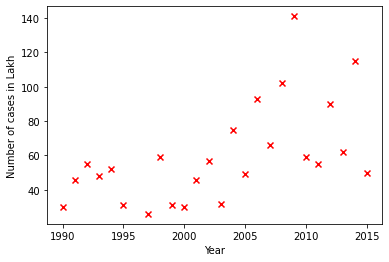

In [71]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['LAKSHADWEEP']], color = 'red', marker = 'x')

In [72]:
y = reg.predict(data_test)
y

array([[ 88.21489398],
       [ 90.34592827],
       [ 92.47696255],
       [ 94.60799684],
       [ 96.73903113],
       [ 98.87006542],
       [101.00109971],
       [103.132134  ],
       [105.26316828],
       [107.39420257],
       [109.52523686],
       [111.65627115],
       [113.78730544],
       [115.91833972],
       [118.04937401]])

In [73]:
data_test['LAKSHADWEEP'] = y

In [74]:
data_test.to_csv("predicted/ld.csv", index = False)
data_test

,YEAR,LAKSHADWEEP
0,2016,88.214894
1,2017,90.345928
2,2018,92.476963
3,2019,94.607997
4,2020,96.739031
5,2021,98.870065
6,2022,101.001100
7,2023,103.132134
8,2024,105.263168
9,2025,107.394203


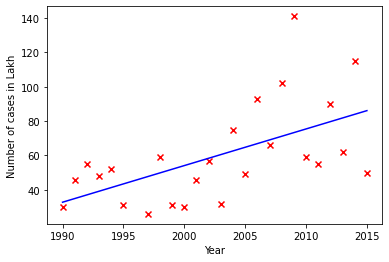

In [75]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Number of cases in Lakh')
plt.scatter(data_train[['YEAR']], data_train[['LAKSHADWEEP']], color = 'red', marker = 'x')
plt.plot(data_train[['YEAR']], reg.predict(data_train[['YEAR']]), color = 'blue')

In [76]:
data_ld = pd.read_csv('predicted/ld.csv')
data_ld.head(4)

,YEAR,LAKSHADWEEP
0,2016,88.214894
1,2017,90.345928
2,2018,92.476963
3,2019,94.607997


In [77]:
mae_ld = metrics.mean_absolute_error(data_ld.head(4)[['LAKSHADWEEP']], data_actual[['LAKSHADWEEP']])
mse_ld = metrics.mean_squared_error(data_ld.head(4)[['LAKSHADWEEP']], data_actual[['LAKSHADWEEP']])
rmse_ld = np.sqrt(mse_ld)

print("MAE:", mae_ld)
print("MSE:", mse_ld)
print("RMSE:", rmse_ld)

MAE: 41.18448285585396
MSE: 2474.197954294888
RMSE: 49.74131033954461


> ## WRITING THE ERROR

In [78]:
filename = "error.csv"
head = ['UT', 'MAE', 'MSE', 'RMSE']
rows = [['Andaman and Nicobar', mae_andaman, mse_andaman, rmse_andaman],
        ['Puducherry', mae_pudu, mse_pudu, rmse_pudu],
        ['Daman and Diu', mae_daman, mse_daman, rmse_daman],
        ['Chandigarh', mae_chandi, mse_chandi, rmse_chandi],
        ['Delhi', mae_delhi, mse_delhi, rmse_delhi],
        ['Jammu and Kashmir', mae_jk, mse_jk, rmse_jk],
        ['Lakshadweep', mae_ld, mse_ld, rmse_ld]]

with open(filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(head)
    csvwriter.writerows(rows)
    
    
    
    #FINALLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL

> ## READING ERROR

In [79]:
data_error = pd.read_csv('error.csv')

In [80]:
data_error

,UT,MAE,MSE,RMSE
0,Andaman and Nicobar,2446.490385,6.254315e+06,2500.862831
1,Puducherry,671.183623,5.642191e+05,751.145221
2,Daman and Diu,72.311414,6.551310e+03,80.940160
3,Chandigarh,701.892398,7.692853e+05,877.089107
4,Delhi,147282.605614,2.280429e+10,151010.888512
5,Jammu and Kashmir,1533.873139,3.167638e+06,1779.786025
6,Lakshadweep,41.184483,2.474198e+03,49.741310
